In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
tr = pd.read_csv('./data/train.csv')
te = pd.read_csv('./data/test.csv')

train = tr.copy()
test = te.copy()

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
train.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,5,4,5,5,3,5,5.0,1,2,2,2,4,5,4,1,3,3,1,1,1.0,4.0,2.0,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,5,5,5,5,1,5,5.0,0,0,0,0,0,3,2,1,3,2,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,10,8,10,10,8,10,7.5,6,4,9,3,12,20,12,6,1,10,2,2,2.5,2.5,2.5,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,5,5,5,5,2,5,5.0,2,1,2,1,4,2,2,1,2,1,2,3,3.0,5.0,1.0,3.0,5,1,3,2,3,4,3,3,4316715.0


In [5]:
train.isnull().sum()

Id            0
Open Date     0
City          0
City Group    0
Type          0
P1            0
P2            0
P3            0
P4            0
P5            0
P6            0
P7            0
P8            0
P9            0
P10           0
P11           0
P12           0
P13           0
P14           0
P15           0
P16           0
P17           0
P18           0
P19           0
P20           0
P21           0
P22           0
P23           0
P24           0
P25           0
P26           0
P27           0
P28           0
P29           0
P30           0
P31           0
P32           0
P33           0
P34           0
P35           0
P36           0
P37           0
revenue       0
dtype: int64

In [6]:
train.shape

(137, 43)

### Baseline Model
- Data Preprocessing

In [7]:
#converting date column to datetime
train['Open Date'] = pd.to_datetime(train['Open Date'])
test['Open Date'] = pd.to_datetime(test['Open Date'])

#extracting years from date columns
train['Year'] = train['Open Date'].apply(lambda x:x.year)
test['Year'] = test['Open Date'].apply(lambda x:x.year)

In [8]:
train.drop('Id', 1, inplace=True)

In [9]:
#encode categorical columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

train['City Group'] = le.fit_transform(train['City Group'])
train['Type'] = le.fit_transform(train.Type)

In [10]:
#frequency encode the city column
cols = ['City']
def freq_enc(df, cols):
  for col in cols:
    df[col] = df[col].map(df[col].value_counts().to_dict())/len(df)
  return df

In [11]:
freq_enc(train, cols)

,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue,Year
0,1999-07-17,0.364964,0,2,4,5.0,4.0,4.0,2,2,5,4,5,5,3,5,5.0,1,2,2,2,4,5,4,1,3,3,1,1,1.0,4.0,2.0,3.0,5,3,4,5,5,4,3,4,5653753.0,1999
1,2008-02-14,0.138686,0,1,4,5.0,4.0,4.0,1,2,5,5,5,5,1,5,5.0,0,0,0,0,0,3,2,1,3,2,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,6923131.0,2008
2,2013-03-09,0.021898,1,2,2,4.0,2.0,5.0,2,3,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,2055379.0,2013
3,2012-02-02,0.007299,1,2,6,4.5,6.0,6.0,4,4,10,8,10,10,8,10,7.5,6,4,9,3,12,20,12,6,1,10,2,2,2.5,2.5,2.5,7.5,25,12,10,6,18,12,12,6,2675511.0,2012
4,2009-05-09,0.007299,1,2,3,4.0,3.0,4.0,2,2,5,5,5,5,2,5,5.0,2,1,2,1,4,2,2,1,2,1,2,3,3.0,5.0,1.0,3.0,5,1,3,2,3,4,3,3,4316715.0,2009
5,2010-02-12,0.138686,0,1,6,6.0,4.5,7.5,8,10,10,8,8,8,10,8,6.0,0,0,0,0,0,5,6,3,1,5,0,0,0.0,0.0,7.5,5.0,0,0,0,0,0,0,0,0,5017319.0,2010
6,2010-10-11,0.364964,0,2,2,3.0,4.0,4.0,1,5,5,5,5,5,2,5,5.0,3,4,4,3,4,2,4,1,2,1,5,4,4.0,5.0,1.0,3.0,4,5,2,2,3,5,4,4,5166635.0,2010
7,2011-06-21,0.364964,0,2,4,5.0,4.0,5.0,2,3,5,4,4,4,4,3,4.0,0,0,0,0,0,3,5,2,4,2,0,0,0.0,0.0,3.0,2.0,0,0,0,0,0,0,0,0,4491607.0,2011
8,2010-08-28,0.007299,1,2,1,1.0,4.0,4.0,1,2,1,5,5,5,1,5,5.0,1,1,2,1,4,1,1,1,1,1,4,4,4.0,2.0,2.0,3.0,4,5,5,3,4,5,4,5,4952497.0,2010
9,2011-11-16,0.007299,1,2,6,4.5,6.0,7.5,6,4,10,10,10,10,2,10,7.5,0,0,0,0,0,25,3,3,1,10,0,0,0.0,0.0,5.0,2.5,0,0,0,0,0,0,0,0,5444227.0,2011


- Baseline Model

In [12]:
from sklearn.linear_model import LinearRegression, Lasso#, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score #for cross validation
from sklearn.model_selection import train_test_split

In [13]:
#instantiate the models
lin_reg = LinearRegression()
lasso = Lasso(alpha=0.5, normalize=False)
#ridge = Ridge()

In [14]:
X = train.drop(['revenue','Open Date'], axis=1)
y = train['revenue']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [16]:
lin_reg.fit(X_train, y_train)
lasso.fit(X_train, y_train)

C:\Users\defaultuser0\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 146637349294065.88, tolerance: 52942729306.99903
  positive)


Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [17]:
print('lin_reg validation MSE: ', np.sqrt(mean_squared_error(y_test, lin_reg.predict(X_test))))
print('lin_reg training MSE: ', np.sqrt(mean_squared_error(y_train, lin_reg.predict(X_train))))

print()

print('lasso validation MSE: ', np.sqrt(mean_squared_error(y_test, lasso.predict(X_test))))
print('lasso training MSE: ', np.sqrt(mean_squared_error(y_train, lasso.predict(X_train))))

lin_reg validation MSE:  3131667.9613679755
lin_reg training MSE:  1757466.6100161427

lasso validation MSE:  3134536.6288130656
lasso training MSE:  1757474.247684212


In [18]:
print('lin_reg R squared:', lin_reg.score(X_test, y_test))
print('lasso R squared:',lasso.score(X_test, y_test))

lin_reg R squared: -0.11433969531564547
lasso R squared: -0.11638214307923556


### Model 1
- Data Preprocessing

In [19]:
train1 = train.copy()

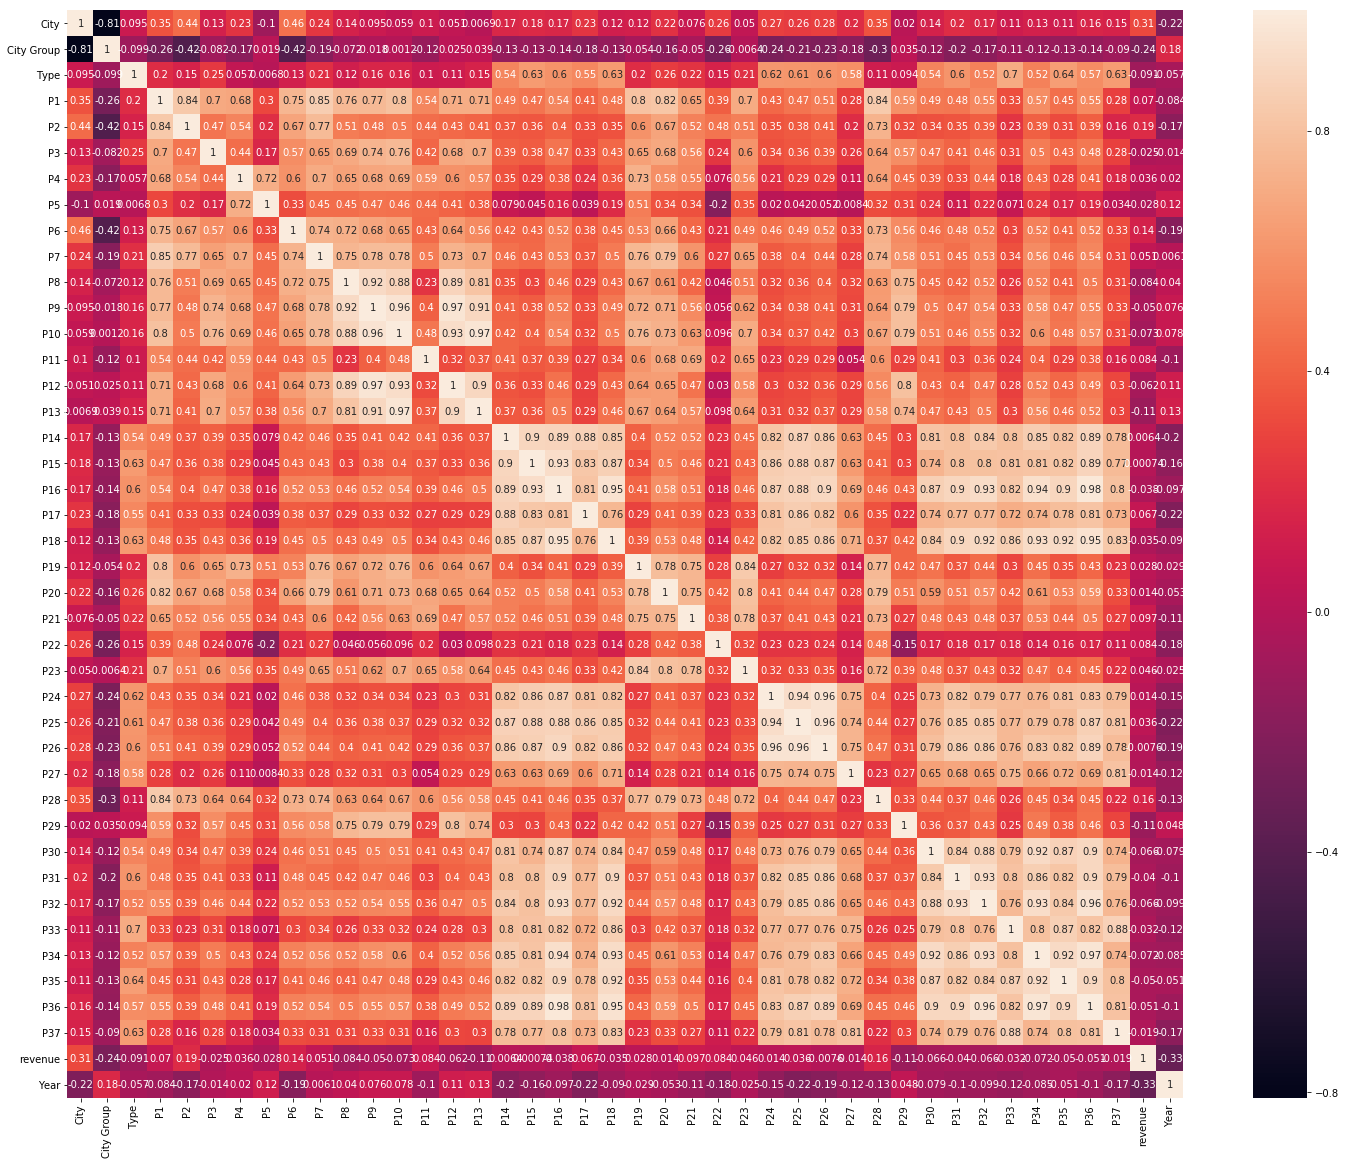

In [20]:
plt.figure(figsize=(25,20))
sns.heatmap(train1.corr(), annot=True)

In [21]:
# Creating correlation matrix
cor_matrix = train1.corr().abs()

# Selecting upper triangle of correlation matrix
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))

# Finding index of feature columns with correlation greater than 0.9
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]
print(to_drop)

['P9', 'P10', 'P12', 'P13', 'P16', 'P18', 'P25', 'P26', 'P31', 'P32', 'P34', 'P35', 'P36']


In [22]:
# Droping Features that are highly correlated
train1.drop(['P9', 'P10', 'P12', 'P13', 'P16', 'P18', 'P25', 'P26', 'P31', 'P32', 'P34', 'P35', 'P36'], axis=1, inplace=True)
train1.head()

,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P11,P14,P15,P17,P19,P20,P21,P22,P23,P24,P27,P28,P29,P30,P33,P37,revenue,Year
0,1999-07-17,0.364964,0,2,4,5.0,4.0,4.0,2,2,5,4,3,1,2,2,5,4,1,3,3,1,4.0,2.0,3.0,5,5,4,5653753.0,1999
1,2008-02-14,0.138686,0,1,4,5.0,4.0,4.0,1,2,5,5,1,0,0,0,3,2,1,3,2,0,0.0,3.0,3.0,0,0,0,6923131.0,2008
2,2013-03-09,0.021898,1,2,2,4.0,2.0,5.0,2,3,5,5,2,0,0,0,1,1,1,1,1,0,0.0,1.0,3.0,0,0,0,2055379.0,2013
3,2012-02-02,0.007299,1,2,6,4.5,6.0,6.0,4,4,10,8,8,6,4,3,20,12,6,1,10,2,2.5,2.5,7.5,25,6,6,2675511.0,2012
4,2009-05-09,0.007299,1,2,3,4.0,3.0,4.0,2,2,5,5,2,2,1,1,2,2,1,2,1,2,5.0,1.0,3.0,5,2,3,4316715.0,2009


In [23]:
x = train1.drop(['revenue','Open Date'], axis=1)
y = train1['revenue']

In [24]:
x.head()

,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P11,P14,P15,P17,P19,P20,P21,P22,P23,P24,P27,P28,P29,P30,P33,P37,Year
0,0.364964,0,2,4,5.0,4.0,4.0,2,2,5,4,3,1,2,2,5,4,1,3,3,1,4.0,2.0,3.0,5,5,4,1999
1,0.138686,0,1,4,5.0,4.0,4.0,1,2,5,5,1,0,0,0,3,2,1,3,2,0,0.0,3.0,3.0,0,0,0,2008
2,0.021898,1,2,2,4.0,2.0,5.0,2,3,5,5,2,0,0,0,1,1,1,1,1,0,0.0,1.0,3.0,0,0,0,2013
3,0.007299,1,2,6,4.5,6.0,6.0,4,4,10,8,8,6,4,3,20,12,6,1,10,2,2.5,2.5,7.5,25,6,6,2012
4,0.007299,1,2,3,4.0,3.0,4.0,2,2,5,5,2,2,1,1,2,2,1,2,1,2,5.0,1.0,3.0,5,2,3,2009


In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [26]:
lin_reg.fit(x_train, y_train)
lasso.fit(x_train, y_train)

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [27]:
print('lin_reg validation MSE: ', np.sqrt(mean_squared_error(y_test, lin_reg.predict(x_test))))
print('lin_reg training MSE: ', np.sqrt(mean_squared_error(y_train, lin_reg.predict(x_train))))

print()

print('lasso validation MSE: ', np.sqrt(mean_squared_error(y_test, lasso.predict(x_test))))
print('lasso training MSE: ', np.sqrt(mean_squared_error(y_train, lasso.predict(x_train))))

lin_reg validation MSE:  2925892.2792127137
lin_reg training MSE:  1934768.363512943

lasso validation MSE:  2925889.519167438
lasso training MSE:  1934768.3635378263


In [28]:
print('lin_reg R squared:', lin_reg.score(x_test, y_test))
print('lasso R squared:',lasso.score(x_test, y_test))

lin_reg R squared: 0.027291191556367167
lasso R squared: 0.027293026701908144


### Model 2

In [29]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [30]:
# making target variable a 2d array for scalling
y_train = np.array(y_train)
y_train = y_train.reshape(-1,1)

y_test = np.array(y_test)
y_test = y_test.reshape(-1,1)

In [31]:
# scalling the target variable
sc.fit(y_train)
y_train = sc.transform(y_train)
y_test = sc.transform(y_test)

In [33]:
lin_reg.fit(x_train, y_train)
lasso.fit(x_train, y_train)

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [34]:
print('lin_reg validation MSE: ', np.sqrt(mean_squared_error(y_test, lin_reg.predict(x_test))))
print('lin_reg training MSE: ', np.sqrt(mean_squared_error(y_train, lin_reg.predict(x_train))))

print()

print('lasso validation MSE: ', np.sqrt(mean_squared_error(y_test, lasso.predict(x_test))))
print('lasso training MSE: ', np.sqrt(mean_squared_error(y_train, lasso.predict(x_train))))

lin_reg validation MSE:  1.2394156407667145
lin_reg training MSE:  0.8195729514839831

lasso validation MSE:  1.2159611383850122
lasso training MSE:  0.9793805045611483


In [35]:
print('lin_reg R squared:', lin_reg.score(x_test, y_test))
print('lasso R squared:',lasso.score(x_test, y_test))

lin_reg R squared: 0.0272911915563675
lasso R squared: 0.06375762346440339


- the model improved more with lasso after scalling in model 2